In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('cpu')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 500, hidden_layers = [10, 10], learning_rate = 0.0015, calibration_threshold = .03)

initial loss:  7.364352226257324
cal loss:  0.6596335172653198 cal error: 0.26888888888888884 nllk loss:  tensor(1.1779, grad_fn=<MeanBackward0>) kernel loss: tensor(2.0622, grad_fn=<MeanBackward0>)
cal loss:  1.1270055770874023 cal error: 0.2542666666666666 nllk loss:  tensor(1.1246, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.8310989737510681 cal error: 0.24159999999999998 nllk loss:  tensor(1.0396, grad_fn=<MeanBackward0>) kernel loss: tensor(1.2349, grad_fn=<MeanBackward0>)
cal loss:  1.022099256515503 cal error: 0.2389777777777778 nllk loss:  tensor(1.0227, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0868, grad_fn=<MeanBackward0>)
cal loss:  0.8219603300094604 cal error: 0.2389777777777778 nllk loss:  tensor(0.9900, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0888, grad_fn=<MeanBackward0>)
cal loss:  1.1360517740249634 cal error: 0.23417777777777773 nllk loss:  tensor(0.9464, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_f

cal loss:  0.5818936228752136 cal error: 0.2588888888888889 nllk loss:  tensor(0.3016, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3938, grad_fn=<MeanBackward0>)
cal loss:  1.3580083847045898 cal error: 0.26155555555555554 nllk loss:  tensor(0.2934, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3431, grad_fn=<MeanBackward0>)
cal loss:  1.621411919593811 cal error: 0.26026666666666665 nllk loss:  tensor(0.2875, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4220, grad_fn=<MeanBackward0>)
cal loss:  0.30317333340644836 cal error: 0.25808888888888887 nllk loss:  tensor(0.2691, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4824, grad_fn=<MeanBackward0>)
cal loss:  1.0565696954727173 cal error: 0.25595555555555555 nllk loss:  tensor(0.2558, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.9036657214164734 cal error: 0.2550222222222222 nllk loss:  tensor(0.2515, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4588, grad_fn=<MeanBackward0>)
cal loss:

cal loss:  0.5707845091819763 cal error: 0.27328888888888886 nllk loss:  tensor(-0.1547, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2757, grad_fn=<MeanBackward0>)
cal loss:  0.6304662227630615 cal error: 0.2770666666666667 nllk loss:  tensor(-0.1673, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2590, grad_fn=<MeanBackward0>)
cal loss:  1.0534971952438354 cal error: 0.2770666666666667 nllk loss:  tensor(-0.1744, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2502, grad_fn=<MeanBackward0>)
cal loss:  0.7845653295516968 cal error: 0.2760888888888889 nllk loss:  tensor(-0.1895, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3603, grad_fn=<MeanBackward0>)
cal loss:  0.8049273490905762 cal error: 0.2730222222222222 nllk loss:  tensor(-0.1959, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3141, grad_fn=<MeanBackward0>)
cal loss:  0.9371686577796936 cal error: 0.26924444444444445 nllk loss:  tensor(-0.2096, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2815, grad_fn=<MeanBackward0>)
ca

cal loss:  0.7776037454605103 cal error: 0.2768 nllk loss:  tensor(-0.5730, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2042, grad_fn=<MeanBackward0>)
cal loss:  1.1666100025177002 cal error: 0.2768 nllk loss:  tensor(-0.5819, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1989, grad_fn=<MeanBackward0>)
cal loss:  1.3896209001541138 cal error: 0.27551111111111115 nllk loss:  tensor(-0.5916, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2169, grad_fn=<MeanBackward0>)
cal loss:  0.6023679971694946 cal error: 0.27551111111111115 nllk loss:  tensor(-0.5988, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.5443524122238159 cal error: 0.2888888888888889 nllk loss:  tensor(-0.6049, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2525, grad_fn=<MeanBackward0>)
cal loss:  0.598152756690979 cal error: 0.2863555555555556 nllk loss:  tensor(-0.6132, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2483, grad_fn=<MeanBackward0>)
cal loss:  0.7924208045005798 

cal loss:  0.29053908586502075 cal error: 0.24639999999999998 nllk loss:  tensor(-0.9845, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.35008999705314636 cal error: 0.24959999999999996 nllk loss:  tensor(-0.9891, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1950, grad_fn=<MeanBackward0>)
cal loss:  0.5755792260169983 cal error: 0.24626666666666663 nllk loss:  tensor(-0.9979, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.4368534982204437 cal error: 0.24408888888888886 nllk loss:  tensor(-1.0056, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2121, grad_fn=<MeanBackward0>)
cal loss:  0.4621420204639435 cal error: 0.24511111111111106 nllk loss:  tensor(-1.0161, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1870, grad_fn=<MeanBackward0>)
cal loss:  0.2922487258911133 cal error: 0.24515555555555552 nllk loss:  tensor(-1.0276, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1759, grad_fn=<MeanBackward0>)
ca

cal loss:  0.2658440172672272 cal error: 0.17684444444444442 nllk loss:  tensor(-1.5128, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1758, grad_fn=<MeanBackward0>)
cal loss:  0.45840534567832947 cal error: 0.1820444444444444 nllk loss:  tensor(-1.5212, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1464, grad_fn=<MeanBackward0>)
cal loss:  0.3335408568382263 cal error: 0.1817333333333333 nllk loss:  tensor(-1.5335, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1881, grad_fn=<MeanBackward0>)
cal loss:  0.2997257113456726 cal error: 0.1772444444444444 nllk loss:  tensor(-1.5453, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1750, grad_fn=<MeanBackward0>)
cal loss:  0.3535981774330139 cal error: 0.17488888888888882 nllk loss:  tensor(-1.5576, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2030, grad_fn=<MeanBackward0>)
cal loss:  0.190792053937912 cal error: 0.18155555555555555 nllk loss:  tensor(-1.5658, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1552, grad_fn=<MeanBackward0>)
c

cal loss:  0.27001458406448364 cal error: 0.11266666666666664 nllk loss:  tensor(-2.0888, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1661, grad_fn=<MeanBackward0>)
cal loss:  0.2431013435125351 cal error: 0.09964444444444442 nllk loss:  tensor(-2.0946, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1437, grad_fn=<MeanBackward0>)
cal loss:  0.19391301274299622 cal error: 0.10759999999999997 nllk loss:  tensor(-2.1043, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.15276893973350525 cal error: 0.09386666666666665 nllk loss:  tensor(-2.1151, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1349, grad_fn=<MeanBackward0>)
cal loss:  0.21147969365119934 cal error: 0.10466666666666666 nllk loss:  tensor(-2.1294, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1552, grad_fn=<MeanBackward0>)
cal loss:  0.18179850280284882 cal error: 0.09337777777777775 nllk loss:  tensor(-2.1328, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)

cal loss:  0.25817519426345825 cal error: 0.07693333333333334 nllk loss:  tensor(-2.5602, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1361, grad_fn=<MeanBackward0>)
cal loss:  0.16578269004821777 cal error: 0.04888888888888884 nllk loss:  tensor(-2.5754, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1457, grad_fn=<MeanBackward0>)
cal loss:  0.35469090938568115 cal error: 0.06915555555555555 nllk loss:  tensor(-2.5914, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.2526189386844635 cal error: 0.044577777777777765 nllk loss:  tensor(-2.6082, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.15943926572799683 cal error: 0.05271111111111112 nllk loss:  tensor(-2.6282, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1314, grad_fn=<MeanBackward0>)
cal loss:  0.16574564576148987 cal error: 0.03128888888888889 nllk loss:  tensor(-2.6448, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1566, grad_fn=<MeanBackward0>

cal loss:  0.1497669517993927 cal error: 0.07346666666666668 nllk loss:  tensor(-2.8501, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1142, grad_fn=<MeanBackward0>)
cal loss:  0.12597016990184784 cal error: 0.05844444444444442 nllk loss:  tensor(-2.8552, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.25655657052993774 cal error: 0.062444444444444455 nllk loss:  tensor(-2.8741, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1145, grad_fn=<MeanBackward0>)
cal loss:  0.09074544161558151 cal error: 0.05155555555555554 nllk loss:  tensor(-2.8896, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.1294531524181366 cal error: 0.05106666666666669 nllk loss:  tensor(-2.9120, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1191, grad_fn=<MeanBackward0>)
cal loss:  0.09552329033613205 cal error: 0.04368888888888888 nllk loss:  tensor(-2.9231, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1539, grad_fn=<MeanBackward0>)

cal loss:  0.15756860375404358 cal error: 0.021333333333333322 nllk loss:  tensor(-3.1272, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1151, grad_fn=<MeanBackward0>)
cal loss:  0.16467265784740448 cal error: 0.017600000000000008 nllk loss:  tensor(-3.1318, grad_fn=<MeanBackward0>) kernel loss: tensor(nan, grad_fn=<MeanBackward0>)
cal loss:  0.10224656760692596 cal error: 0.026133333333333314 nllk loss:  tensor(-3.1348, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1123, grad_fn=<MeanBackward0>)
cal loss:  0.13984282314777374 cal error: 0.01457777777777779 nllk loss:  tensor(-3.1390, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1370, grad_fn=<MeanBackward0>)
cal loss:  0.13953587412834167 cal error: 0.027288888888888883 nllk loss:  tensor(-3.1349, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1340, grad_fn=<MeanBackward0>)
cal loss:  0.10333497077226639 cal error: 0.0244888888888889 nllk loss:  tensor(-3.1315, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1451, grad_fn=<MeanBack

cal loss:  0.0499890111386776 cal error: 0.06222222222222221 nllk loss:  tensor(-3.1556, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1288, grad_fn=<MeanBackward0>)
final loss:  -2.7691292762756348


End2end test MAPE:  0.35600787
End2end test RMSE:  64.47116
End2end test NLLK:  7.904508
End2end test CRPS:  tensor(22.6877)


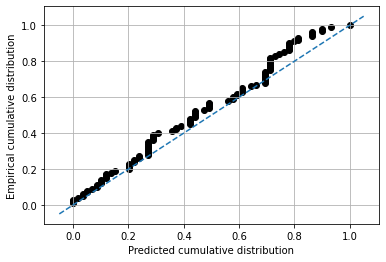

End2end test calibration error when step size is 0.001:  3.4573758977305378
End2end test calibration error when step size is 0.01:  0.3447960356219479
End2end test calibration error when step size is 0.1:  0.0364406779661017


In [5]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


  0%|                                                   | 0/10 [00:00<?, ?it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.62it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.81it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           32.318
  RMSE          64.471
  MDAE          12.534
  MARPD         34.282
  R2            0.770
  Correlation   0.881
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.054
  Mean-absolute Calibration Error       0.047
  Miscalibration Area                   0.047
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.226
     Group Size: 0.56 -- Calibration Error: 0.084
     Group Size: 1.00 -- Calibration Error: 0.047
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.254
     Group Size: 0.56 -- Calibration Error: 0.121
     Group Size: 1.00 -- Calibration Error: 0.054
============

Lims is None. Setting lims now:
min_max_true: (7.0, 915.0)
min_max_pred: (11.755058, 671.52515)
lims: (7.0, 915.0)
lims_ext: (-83.80000000000001, 1005.8)


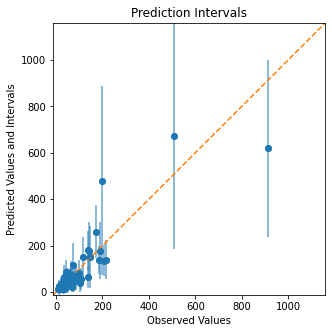

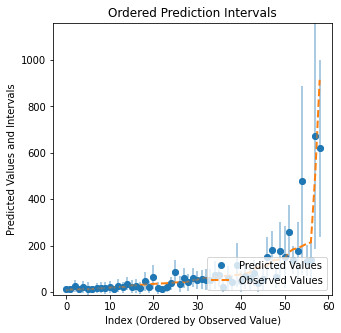

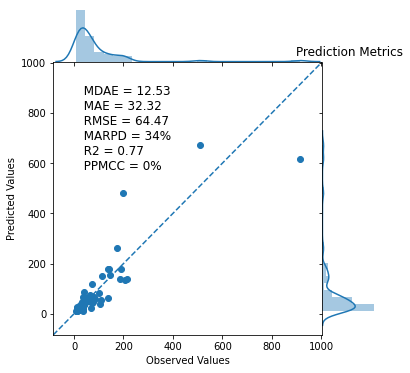

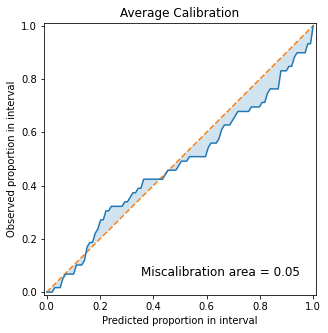

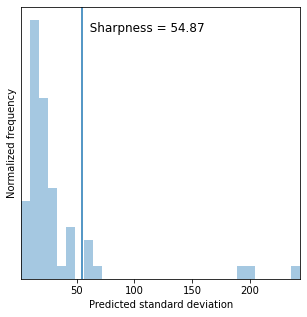

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))